<font color="green" size = 10px> <b>Multiple Linear Regression</b> </font>

## Importing Libraries

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Loading Dataset

In [3]:
data = pd.read_csv("multiple_linear_regression.csv")

In [4]:
data.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  200 non-null    float64
 1   Feature 2  200 non-null    float64
 2   Feature 3  200 non-null    float64
 3   Target     200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Data Preprocessing

In [6]:
data = data.dropna()

In [7]:
data.shape

(200, 4)

## Spliting Data

In [8]:
output_col = "Target"
x = data.iloc[:, data.columns != output_col]
y = data.loc[:, output_col]

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = 0.30, random_state = 43)

In [10]:
y_test.head()

56     5.5
37    14.7
67    13.4
79    11.0
80    11.8
Name: Target, dtype: float64

## Training

In [11]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [13]:
lr.coef_

array([ 0.0459782 ,  0.18092867, -0.00194226])

In [14]:
lr.intercept_

3.0777744955280433

## Predicting Test Input

In [15]:
predicted_value = lr.predict(x_test)

In [16]:
cost = mean_squared_error(y_test, predicted_value)

In [17]:
cost

2.241286253093347

## Ploting graph between actual and predicted values

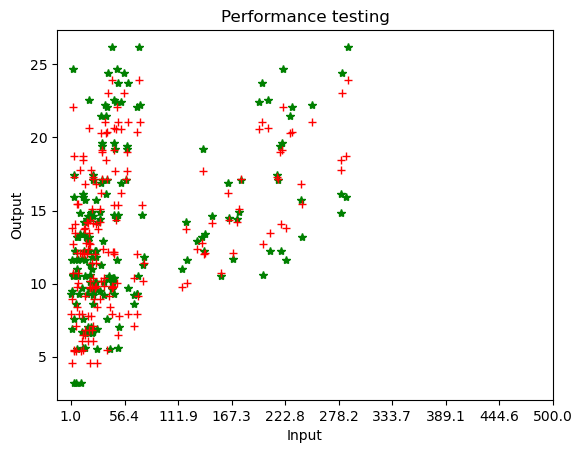

In [18]:
plt.plot(x_test, y_test, "*", color = "green")
plt.plot(x_test, predicted_value, "+", color = "red")
plt.title("Performance testing")
plt.xlabel("Input")
plt.xticks(np.linspace(1, 500, 10))
plt.ylabel("Output")
plt.show()

<font size=8 px color= "red"> OLS summary</font>

### Constraint added 

In [19]:
x_with_constant = sm.add_constant(x_train)

In [20]:
x_with_constant

,const,Feature 1,Feature 2,Feature 3
71,1.0,109.8,14.3,31.7
90,1.0,134.3,4.9,9.3
100,1.0,222.4,4.3,49.8
44,1.0,25.1,25.7,43.3
94,1.0,107.4,14.0,10.9
...,...,...,...,...
58,1.0,210.8,49.6,37.7
21,1.0,237.4,5.1,23.5
49,1.0,66.9,11.7,36.8
64,1.0,131.1,42.8,28.9


# OLS summary

In [22]:
result = sm.OLS(y_train, x_with_constant).fit()

In [23]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     346.9
Date:                Fri, 16 Feb 2024   Prob (F-statistic):           1.67e-63
Time:                        11:19:55   Log-Likelihood:                -276.47
No. Observations:                 140   AIC:                             560.9
Df Residuals:                     136   BIC:                             572.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0778      0.398      7.735      0.0

As we can se the P value of T-test for Feature 3 is very high(7.80), we can drop this column as it is not contributing to the model prediction.

In [29]:
data.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Dropping the unncessary Column from the database

In [30]:
data.drop("Feature 3", axis=1, inplace=True)

In [31]:
data.head()

,Feature 1,Feature 2,Target
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,9.3
3,151.5,41.3,18.5
4,180.8,10.8,12.9


# New Model Training

In [32]:
output_col = "Target"
x = data.iloc[:, data.columns != output_col]
y = data.loc[:, output_col]

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = 0.40, random_state = 43)

In [40]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [41]:
lr.coef_

array([0.04668084, 0.1778377 ])

In [42]:
lr.intercept_

2.9879120103440933

In [43]:
predicted_value = lr.predict(x_test)
cost = mean_squared_error(y_test, predicted_value)

# New Model Prediction Comparision 

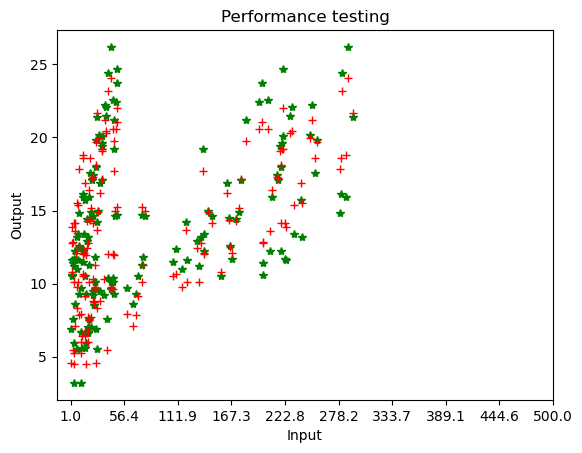

In [44]:
plt.plot(x_test, y_test, "*", color = "green")
plt.plot(x_test, predicted_value, "+", color = "red")
plt.title("Performance testing")
plt.xlabel("Input")
plt.xticks(np.linspace(1, 500, 10))
plt.ylabel("Output")
plt.show()

In [45]:
cost

1.9992251581391076

In [47]:
x_with_constant = sm.add_constant(x_train)


In [48]:
model = sm.OLS(y_train, x_with_constant)

In [49]:
result = model.fit()

# New OLS summary

In [50]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     416.0
Date:                Fri, 16 Feb 2024   Prob (F-statistic):           6.63e-54
Time:                        11:26:09   Log-Likelihood:                -242.92
No. Observations:                 120   AIC:                             491.8
Df Residuals:                     117   BIC:                             500.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9879      0.424      7.052      0.0

Here we can see that removal of "Feature 3" column does not affected our model.